In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as ListedColormap



In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-03-05/trashwheel.csv')
df

,ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered
0,mister,Mister Trash Wheel,1,May,2014,5/16/2014,4.31,18,1450.0,1820.0,126000.0,72.0,584.0,1162.0,7.0,0
1,mister,Mister Trash Wheel,2,May,2014,5/16/2014,2.74,13,1120.0,1030.0,91000.0,42.0,496.0,874.0,5.0,0
2,mister,Mister Trash Wheel,3,May,2014,5/16/2014,3.45,15,2450.0,3100.0,105000.0,50.0,1080.0,2032.0,6.0,0
3,mister,Mister Trash Wheel,4,May,2014,5/17/2014,3.10,15,2380.0,2730.0,100000.0,52.0,896.0,1971.0,6.0,0
4,mister,Mister Trash Wheel,5,May,2014,5/17/2014,4.06,18,980.0,870.0,120000.0,72.0,368.0,753.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,gwynnda,Gwynnda Trash Wheel,215,December,2023,12/27/23,3.96,15,500.0,40.0,1000.0,NaN,40.0,750.0,NaN,66
989,gwynnda,Gwynnda Trash Wheel,216,December,2023,12/27/23,3.38,15,1200.0,90.0,1200.0,NaN,60.0,1000.0,NaN,56
990,gwynnda,Gwynnda Trash Wheel,217,December,2023,12/28/23,4.02,15,180.0,24.0,360.0,NaN,40.0,400.0,NaN,67
991,gwynnda,Gwynnda Trash Wheel,218,December,2023,12/29/23,3.49,15,0.0,0.0,0.0,NaN,0.0,0.0,NaN,58


In [31]:
subset = df.loc[:, 'ID':'Volume']
subset['HomesPowered'] = df['HomesPowered']


In [46]:

df_long = df.melt(id_vars=subset, var_name='Type', value_name='Count')
df_long.head()


,ID,Name,Dumpster,Month,Year,Date,Weight,Volume,HomesPowered,Type,Count
0,mister,Mister Trash Wheel,1,May,2014,5/16/2014,4.31,18,0,PlasticBottles,1450.0
1,mister,Mister Trash Wheel,2,May,2014,5/16/2014,2.74,13,0,PlasticBottles,1120.0
2,mister,Mister Trash Wheel,3,May,2014,5/16/2014,3.45,15,0,PlasticBottles,2450.0
3,mister,Mister Trash Wheel,4,May,2014,5/17/2014,3.10,15,0,PlasticBottles,2380.0
4,mister,Mister Trash Wheel,5,May,2014,5/17/2014,4.06,18,0,PlasticBottles,980.0


In [47]:
df_long['ym'] = df_long['Month'].str.cat(df_long['Year'].astype(str), sep=' ')
df_long.head()

,ID,Name,Dumpster,Month,Year,Date,Weight,Volume,HomesPowered,Type,Count,ym
0,mister,Mister Trash Wheel,1,May,2014,5/16/2014,4.31,18,0,PlasticBottles,1450.0,May 2014
1,mister,Mister Trash Wheel,2,May,2014,5/16/2014,2.74,13,0,PlasticBottles,1120.0,May 2014
2,mister,Mister Trash Wheel,3,May,2014,5/16/2014,3.45,15,0,PlasticBottles,2450.0,May 2014
3,mister,Mister Trash Wheel,4,May,2014,5/17/2014,3.10,15,0,PlasticBottles,2380.0,May 2014
4,mister,Mister Trash Wheel,5,May,2014,5/17/2014,4.06,18,0,PlasticBottles,980.0,May 2014


In [51]:
grouped_data = df_long.groupby(['ym', 'Name', 'Type'])['Count'].sum().reset_index()
grouped_data.rename(columns={'Count': 'bigcount'}, inplace=True)

grouped_data.head()



,ym,Name,Type,bigcount
0,April 2015,Mister Trash Wheel,CigaretteButts,177000.0
1,April 2015,Mister Trash Wheel,GlassBottles,188.0
2,April 2015,Mister Trash Wheel,PlasticBags,2760.0
3,April 2015,Mister Trash Wheel,PlasticBottles,13330.0
4,April 2015,Mister Trash Wheel,Polystyrene,16250.0


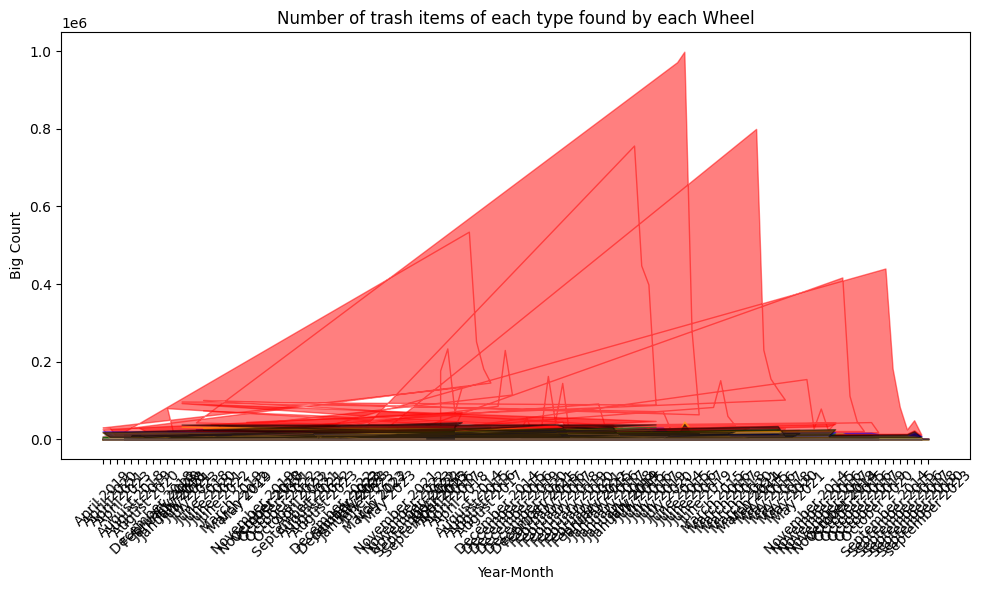

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors
colors = {'PlasticBottles': 'blue', 'CigaretteButts': 'red', 'PlasticBags': 'green', 'Polystyrene': 'orange', 'GlassBottles': 'yellow', 'SportsBalls': 'pink', 'Wrappers': 'black'}

# Iterate over each group (Name, type) and plot streamgraph
for key, group in grouped_data.groupby(['Name', 'Type']):
    name, t = key
    ax.fill_between(group['ym'], group['bigcount'], color=colors[t], alpha=0.5)

# Set labels and title
ax.set_xlabel('Year-Month')
ax.set_ylabel('Big Count')
ax.set_title('Number of trash items of each type found by each Wheel')

# Add legend
# legend_labels = ['Pla,stic', 'B']
# legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in legend_labels]
# ax.legend(legend_handles, legend_labels)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()